In [1]:
import pickle

import numpy as np

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

from sklearn import cross_validation, metrics
from sklearn.metrics import classification_report

from sklearn.grid_search import GridSearchCV 

import pandas as pd

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
data_train,data_test = pickle.load(open("./datas_clean_V1.ggy","rb"))

data_train.head()

,SalePrice,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1,60,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,181500,2,20,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,223500,3,60,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,140000,4,70,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,250000,5,60,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [3]:
def showColums():
    
    print('+'*20)
    
    print(data_train.columns.values.tolist())
    print('-'*20)
    print(data_test.columns.values.tolist())

    print('+'*20)
    
    data_train.info()
    print('-'*20)
    data_test.info()
    
    print('+'*20)
    
showColums()

++++++++++++++++++++
['SalePrice', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighbo

In [4]:
from sklearn import cross_validation

split_train, split_cv = cross_validation.train_test_split(data_train, test_size=0.3, random_state=0)

train_np = split_train.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 2:]

print(X.shape,y.shape)


train_np_v = split_cv.as_matrix()

# y即Survival结果
y_v = train_np_v[:, 0]

# X即特征属性值
X_v = train_np_v[:, 2:]

print(X_v.shape,y_v.shape)
#print(split_cv.info())

(1022, 258) (1022,)
(438, 258) (438,)


D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [8]:
def showModelAbility(rf,X=X,y=y):
    
    y_pred = rf.predict(X)

    print(y)
    print(y_pred)

    print('score',rf.score(X,y) )
    print('oob_score_',rf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation, metrics

rf0 = RandomForestRegressor(oob_score=True, random_state=10)  
rf0.fit(X,y)  


showModelAbility(rf0)

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223360. 163200. 112650. ... 125600. 221150. 224750.]
score 0.9678165722434093
oob_score_ 0.7422380301707738
R^2 0.9678165722434093
均方误差 196311063.29103717
平均绝对误差 8159.8009784735805


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [10]:
from sklearn.grid_search import GridSearchCV 


#首先对n_estimators进行网格搜索  
param_test1= {'n_estimators':list(range(10,201,10))}  
gsearch1= GridSearchCV(estimator = RandomForestRegressor(oob_score=True,random_state=10),  
                       param_grid =param_test1,cv=5)  
gsearch1.fit(X,y)  
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_ 

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

([mean: 0.82188, std: 0.03459, params: {'n_estimators': 10},
  mean: 0.84193, std: 0.03221, params: {'n_estimators': 20},
  mean: 0.84749, std: 0.03521, params: {'n_estimators': 30},
  mean: 0.84529, std: 0.03695, params: {'n_estimators': 40},
  mean: 0.84562, std: 0.03898, params: {'n_estimators': 50},
  mean: 0.84674, std: 0.03526, params: {'n_estimators': 60},
  mean: 0.84745, std: 0.03496, params: {'n_estimators': 70},
  mean: 0.84804, std: 0.03516, params: {'n_estimators': 80},
  mean: 0.84885, std: 0.03375, params: {'n_estimators': 90},
  mean: 0.84917, std: 0.03367, params: {'n_estimators': 100},
  mean: 0.85055, std: 0.03245, params: {'n_estimators': 110},
  mean: 0.84999, std: 0.03211, params: {'n_estimators': 120},
  mean: 0.85139, std: 0.03157, params: {'n_estimators': 130},
  mean: 0.85074, std: 0.03246, params: {'n_estimators': 140},
  mean: 0.85146, std: 0.03191, params: {'n_estimators': 150},
  mean: 0.85184, std: 0.03170, params: {'n_estimators': 160},
  mean: 0.85190, 

In [11]:
best_n_estimators = gsearch1.best_params_["n_estimators"]

param_test2= {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(2,50,5))}  
gsearch2= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,oob_score=True,random_state=10),  
   param_grid = param_test2,iid=False, cv=5)  
gsearch2.fit(X,y)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.75743, std: 0.02570, params: {'max_depth': 3, 'min_samples_split': 2},
  mean: 0.75707, std: 0.02580, params: {'max_depth': 3, 'min_samples_split': 7},
  mean: 0.75724, std: 0.02547, params: {'max_depth': 3, 'min_samples_split': 12},
  mean: 0.75743, std: 0.02436, params: {'max_depth': 3, 'min_samples_split': 17},
  mean: 0.75622, std: 0.02404, params: {'max_depth': 3, 'min_samples_split': 22},
  mean: 0.75557, std: 0.02402, params: {'max_depth': 3, 'min_samples_split': 27},
  mean: 0.75490, std: 0.02404, params: {'max_depth': 3, 'min_samples_split': 32},
  mean: 0.75332, std: 0.02335, params: {'max_depth': 3, 'min_samples_split': 37},
  mean: 0.75266, std: 0.02321, params: {'max_depth': 3, 'min_samples_split': 42},
  mean: 0.75161, std: 0.02278, params: {'max_depth': 3, 'min_samples_split': 47},
  mean: 0.82327, std: 0.02862, params: {'max_depth': 5, 'min_samples_split': 2},
  mean: 0.82366, std: 0.02720, params: {'max_depth': 5, 'min_samples_split': 7},
  mean: 0.82204, std

In [12]:
best_max_depth = gsearch2.best_params_["max_depth"]
best_min_samples_split = gsearch2.best_params_["min_samples_split"]

rf1= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            oob_score=True,random_state=10)  
rf1.fit(X,y)  

tempRf = rf1

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[226059.44415038 169625.38816722 118040.84711135 ... 127587.10660704
 217768.24667566 223235.47539601]
score 0.979648381554226
oob_score_ 0.8520520205356128
R^2 0.9796483815542258
均方误差 124139910.98152237
平均绝对误差 6786.517142229784


In [13]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参 
param_test3= {'min_samples_split':list(range(2,40,5)), 'min_samples_leaf':list(range(2,40,5))}  
gsearch3= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth,oob_score=True, random_state=10),  
   param_grid = param_test3,iid=False, cv=5)  
gsearch3.fit(X,y)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_ 

([mean: 0.84806, std: 0.03456, params: {'min_samples_leaf': 2, 'min_samples_split': 2},
  mean: 0.84661, std: 0.03182, params: {'min_samples_leaf': 2, 'min_samples_split': 7},
  mean: 0.84294, std: 0.02921, params: {'min_samples_leaf': 2, 'min_samples_split': 12},
  mean: 0.84007, std: 0.02717, params: {'min_samples_leaf': 2, 'min_samples_split': 17},
  mean: 0.83460, std: 0.02635, params: {'min_samples_leaf': 2, 'min_samples_split': 22},
  mean: 0.82914, std: 0.02725, params: {'min_samples_leaf': 2, 'min_samples_split': 27},
  mean: 0.82384, std: 0.02755, params: {'min_samples_leaf': 2, 'min_samples_split': 32},
  mean: 0.81797, std: 0.02707, params: {'min_samples_leaf': 2, 'min_samples_split': 37},
  mean: 0.84093, std: 0.03045, params: {'min_samples_leaf': 7, 'min_samples_split': 2},
  mean: 0.84093, std: 0.03045, params: {'min_samples_leaf': 7, 'min_samples_split': 7},
  mean: 0.84093, std: 0.03045, params: {'min_samples_leaf': 7, 'min_samples_split': 12},
  mean: 0.83848, std: 0.0

In [14]:
best_min_samples_leaf = gsearch3.best_params_["min_samples_leaf"]
best_min_samples_split = gsearch3.best_params_["min_samples_split"]

#最后我们再对最大特征数max_features做调参:  
param_test4= {'max_features':list(range(3,int(258*2/3),20))}  
gsearch4= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth, 
                                                          min_samples_split=best_min_samples_split,  
                                                          min_samples_leaf=best_min_samples_leaf ,
                                                          oob_score=True, random_state=10),  
                                                       param_grid = param_test4,iid=False, cv=5)  
gsearch4.fit(X,y)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_ 

([mean: 0.71573, std: 0.05625, params: {'max_features': 3},
  mean: 0.84915, std: 0.03945, params: {'max_features': 23},
  mean: 0.85381, std: 0.03701, params: {'max_features': 43},
  mean: 0.85389, std: 0.03515, params: {'max_features': 63},
  mean: 0.85527, std: 0.03212, params: {'max_features': 83},
  mean: 0.85520, std: 0.03251, params: {'max_features': 103},
  mean: 0.85171, std: 0.03552, params: {'max_features': 123},
  mean: 0.85113, std: 0.03283, params: {'max_features': 143},
  mean: 0.85315, std: 0.03467, params: {'max_features': 163}],
 {'max_features': 83},
 0.8552713745096121)

In [15]:
best_max_features = gsearch4.best_params_["max_features"]

#用我们搜索到的最佳参数，我们再看看最终的模型拟合：  
rf2= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,  
                            min_samples_leaf=best_min_samples_leaf,
                            max_features=best_max_features ,
                            oob_score=True, random_state=10)  
rf2.fit(X,y) 

tempRf = rf2

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223328.63663719 169143.06938412 115470.07991377 ... 127865.70642416
 212486.35543514 215541.63036895]
score 0.9660908464345505
oob_score_ 0.8525970245408772
R^2 0.9660908464345505
均方误差 206837570.00897038
平均绝对误差 7856.2490397675565


In [16]:
for rf in [rf0,rf1,rf2]:
    tempRf = rf

    y_pred = tempRf.predict(X)

    print(y)
    print(y_pred)

    print('score',tempRf.score(X,y) )
    print('oob_score_',tempRf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )
    
    print('-'*20)

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223360. 163200. 112650. ... 125600. 221150. 224750.]
score 0.9678165722434093
oob_score_ 0.7422380301707738
R^2 0.9678165722434093
均方误差 196311063.29103717
平均绝对误差 8159.8009784735805
--------------------
[219500. 173000. 116500. ... 112000. 234000. 221000.]
[226059.44415038 169625.38816722 118040.84711135 ... 127587.10660704
 217768.24667566 223235.47539601]
score 0.979648381554226
oob_score_ 0.8520520205356128
R^2 0.9796483815542258
均方误差 124139910.98152237
平均绝对误差 6786.517142229784
--------------------
[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223328.63663719 169143.06938412 115470.07991377 ... 127865.70642416
 212486.35543514 215541.63036895]
score 0.9660908464345505
oob_score_ 0.8525970245408772
R^2 0.9660908464345505
均方误差 206837570.00897038
平均绝对误差 7856.2490397675565
--------------------


In [17]:
train_all = data_train.values

# y即Survival结果
y_all = train_all[:, 0]

# X即特征属性值
X_all = train_all[:, 2:]

print(X_all.shape)

(1460, 258)


In [18]:
import copy

rf_final = copy.copy(rf2)

rf_final.fit(X_all,y_all)  

showModelAbility(rf_final,X_all,y_all)

print (rf_final)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[206537.82162396 175854.16767702 219988.13485799 ... 248098.01802435
 136821.97793665 148368.10068563]
score 0.9705084165617379
oob_score_ 0.8659385296111973
R^2 0.9705084165617379
均方误差 185997181.79230803
平均绝对误差 7666.003838741627
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=83, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=True, random_state=10,
           verbose=0, warm_start=False)


In [20]:
names = data_train.columns.values.tolist()[2:]

results = pd.DataFrame({"ColName":names,"value":rf_final.feature_importances_})

results.head()

,ColName,value
0,MSSubClass,0.002467
1,LotArea,0.018207
2,OverallQual,0.275270
3,OverallCond,0.003726
4,YearBuilt,0.043508


In [22]:
results =results.sort_values("value",ascending =False)
results.head(30)

,ColName,value
2,OverallQual,0.275270
13,GrLivArea,0.117112
23,GarageCars,0.100834
142,ExterQual_TA,0.058140
10,TotalBsmtSF,0.046657
4,YearBuilt,0.043508
11,1stFlrSF,0.039448
24,GarageArea,0.038171
12,2ndFlrSF,0.027454
7,BsmtFinSF1,0.022854


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


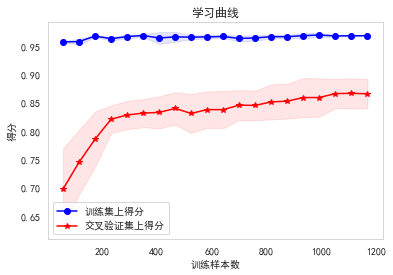

In [23]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


from sklearn.learning_curve import learning_curve


# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if True:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, '*-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.gca().invert_yaxis()
        plt.draw()
        plt.show()
        

    #midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    #diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    #return midpoint, diff


plot_learning_curve(rf_final, u"学习曲线", X_all, y_all,cv=5)

In [ ]:
#过拟合了

In [42]:
for data,name in zip(data_test.isnull().sum(),names):
    print(data,name)

0 MSSubClass
0 LotArea
0 OverallQual
0 OverallCond
0 YearBuilt
0 YearRemodAdd
0 MasVnrArea
0 BsmtFinSF1
0 BsmtFinSF2
0 BsmtUnfSF
0 TotalBsmtSF
0 1stFlrSF
0 2ndFlrSF
0 GrLivArea
0 BsmtFullBath
0 BsmtHalfBath
0 FullBath
0 HalfBath
0 BedroomAbvGr
0 KitchenAbvGr
0 TotRmsAbvGrd
0 Fireplaces
0 GarageYrBlt
0 GarageCars
0 GarageArea
0 WoodDeckSF
0 OpenPorchSF
0 EnclosedPorch
0 MoSold
0 YrSold
0 MSZoning_C (all)
0 MSZoning_FV
0 MSZoning_RH
0 MSZoning_RL
0 MSZoning_RM
0 LotShape_IR1
0 LotShape_IR2
0 LotShape_IR3
0 LotShape_Reg
0 LandContour_Bnk
0 LandContour_HLS
0 LandContour_Low
0 LandContour_Lvl
0 LotConfig_Corner
0 LotConfig_CulDSac
0 LotConfig_FR2
0 LotConfig_FR3
0 LotConfig_Inside
0 LandSlope_Gtl
0 LandSlope_Mod
0 LandSlope_Sev
0 Neighborhood_Blmngtn
0 Neighborhood_Blueste
0 Neighborhood_BrDale
0 Neighborhood_BrkSide
0 Neighborhood_ClearCr
0 Neighborhood_CollgCr
0 Neighborhood_Crawfor
0 Neighborhood_Edwards
0 Neighborhood_Gilbert
0 Neighborhood_IDOTRR
0 Neighborhood_MeadowV
0 Neighborhood_M

In [38]:
data_test.info()

ids = data_test.values[:,0]

X_test = data_test.values[:,1:]

print(X_test.shape)


y_pred = rf_final.predict(X_test)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: float64(16), int64(21), uint8(222)
memory usage: 738.1 KB
(1459, 258)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [27]:
resluts = pd.DataFrame({"Id":ids,"SalePrice":y_pred})

ValueError: arrays must all be same length